# 4. Networkx

[NetworkX](https://networkx.github.io/documentation/networkx-1.10/overview.html) is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

Creating a network begins with conceptualising our data into **nodes** and **edges**:

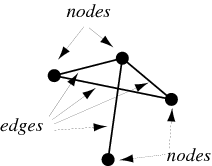

In [1]:
from IPython.display import Image
Image("GraphNodesEdges_1000.png")

Where nodes refer to the elements themselves or objects, and edges refer to the *relationships* between the nodes.

In [2]:
import networkx as nx

In [3]:
G = nx.Graph()
G

By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc. (Note: Pythonâ€™s None object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.)

## Nodes

We can add one node or several at a time:

In [4]:
G.add_node(1)
G.nodes()

NodeView((1,))

In [5]:
G.add_nodes_from([2, 3])
G.nodes()

NodeView((1, 2, 3))

## Edges

Adding edges between nodes is equally trivial:

In [6]:
G.add_edge(1,2)
G.edges()

EdgeView([(1, 2)])

In [7]:
G.add_edges_from([(1,3), (2,3)])
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

We can remove a node, and all associated edge connections with it:

In [8]:
G.remove_node(1)

In [9]:
G.nodes()

NodeView((2, 3))

In [10]:
G.edges()

EdgeView([(2, 3)])

Or remove everything:

In [11]:
G.clear()
G.nodes()

NodeView(())

If we add nodes that already exist, Networkx quietly ignores any duplicates:

In [12]:
G.add_nodes_from([1,2,3])
G.add_edges_from([(1,2),(1,3),(2,3)])
G.add_node(2)
G.nodes()

NodeView((1, 2, 3))

In [13]:
G.add_nodes_from("spam")
G.nodes()

NodeView((1, 2, 3, 'm', 's', 'a', 'p'))

In [14]:
G.number_of_nodes()

7

In [15]:
G.number_of_edges()

3

You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using `G.add_edge(n1,n2,object=x)`.

As an example, n1 and n2 could be protein objects from the RCSB Protein Data Bank, and x could refer to an XML record of publications detailing experimental observations of their interaction.

We have found this power quite useful, but its abuse can lead to unexpected surprises unless one is familiar with Python. If in doubt, consider using `convert_node_labels_to_integers()` to obtain a more traditional graph with integer labels.

### Accessing Edges

In addition to `nodes()`, `edges()` and `neighbors()`, iterator versions can save you from creating large lists when you were just going to iterate through them anyway:}

In [16]:
for i in G.edges:
    print(i)

(1, 2)
(1, 3)
(2, 3)


### Direct Access

In [17]:
G[1] # do not change the resulting dict

AtlasView({2: {}, 3: {}})

In [18]:
G[1][2] 

{}

In [19]:
G[1][2]['color']='blue'
G[1][2]

{'color': 'blue'}

In [20]:
G.add_weighted_edges_from([('s', 'p', 0.5), ('p', 'm', .1), ('m', 3, .7), ('a', 2, .3)])
G.edges(data=True)

EdgeDataView([(1, 2, {'color': 'blue'}), (1, 3, {}), (2, 'a', {'weight': 0.3}), (2, 3, {}), (3, 'm', {'weight': 0.7}), ('m', 'p', {'weight': 0.1}), ('s', 'p', {'weight': 0.5})])

### Node Attributes

You can also add these attributes to nodes:

In [21]:
G.node[1]['room'] = 700
G.nodes(data=True)

NodeDataView({1: {'room': 700}, 2: {}, 3: {}, 'm': {}, 's': {}, 'a': {}, 'p': {}})

## Directed Graphs

The DiGraph class provides additional methods specific to directed edges, e.g. `DiGraph.out_edges()`, `DiGraph.in_degree()`, `DiGraph.predecessors()`, `DiGraph.successors()` etc. To allow algorithms to work with both classes easily, the directed versions of `neighbors()` and `degree()` are equivalent to `successors()` and the sum of `in_degree()` and `out_degree()` respectively even though that may feel inconsistent at times.

In [22]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,.5), (1,3,.75),(2,3,.25)])
DG.nodes()

NodeView((1, 2, 3))

In [23]:
DG.out_degree()

OutDegreeView({1: 2, 2: 1, 3: 0})

In [24]:
DG.degree()

DiDegreeView({1: 2, 2: 2, 3: 2})

In [25]:
DG.successors(1)

In [26]:
# convert to undirected
G = nx.Graph(DG)
G

## Graph Generators and Operations

In [27]:
peterson = nx.petersen_graph()
print(peterson.nodes())
print(peterson.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 8), (3, 4), (4, 9), (5, 8), (5, 7), (6, 8), (6, 9), (7, 9)]


In [28]:
tutte=nx.tutte_graph()
maze=nx.sedgewick_maze_graph()
tet=nx.tetrahedral_graph()

Constructive generators for classic graphs:

In [29]:
K5 = nx.complete_graph(5)
K5.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

In [30]:
K35 = nx.complete_bipartite_graph(3,5)
print(K35.nodes())
print(K35.edges())

[0, 1, 2, 3, 4, 5, 6, 7]
[(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)]


## Reading/Writing Graphs

Reading a graph stored in a file using common graph formats, such as edge lists, adjacency lists, GML, GraphML, pickle, LEDA and others.

In [31]:
K10 = nx.complete_graph(10)
nx.write_gml(K10, "toy_graph.gml")

In [32]:
mygraph = nx.read_gml("toy_graph.gml")

## Analysing Graphs

In [33]:
for i in nx.connected_components(mygraph):
    print(i)

{'4', '6', '5', '0', '1', '3', '2', '8', '9', '7'}


In [34]:
nx.degree(mygraph)

DegreeView({'0': 9, '5': 9, '1': 9, '3': 9, '4': 9, '2': 9, '8': 9, '9': 9, '6': 9, '7': 9})

In [35]:
nx.clustering(mygraph)

{'0': 1.0,
 '1': 1.0,
 '2': 1.0,
 '3': 1.0,
 '4': 1.0,
 '5': 1.0,
 '6': 1.0,
 '7': 1.0,
 '8': 1.0,
 '9': 1.0}

## Drawing Graphs

NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing package and will be imported if possible.

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

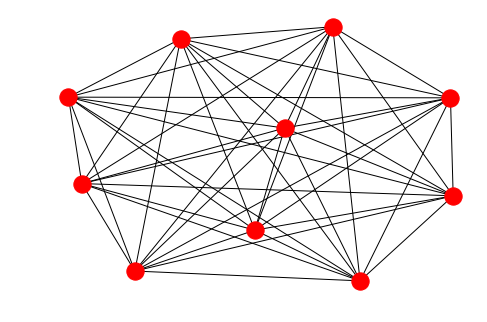

In [37]:
nx.draw(mygraph)

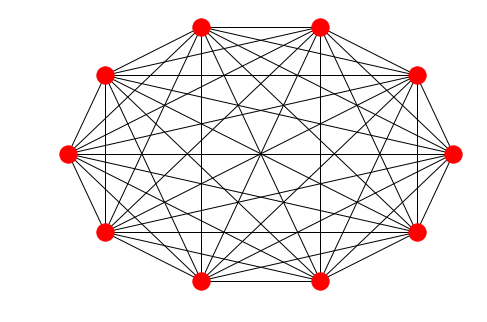

In [38]:
nx.draw_circular(mygraph)
plt.savefig("circular_complete.png")

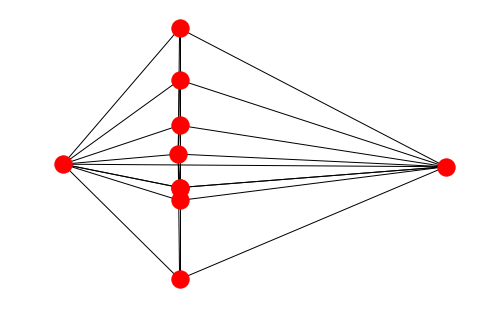

In [39]:
nx.draw_spectral(mygraph)

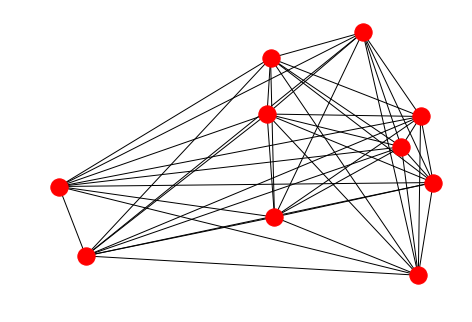

In [40]:
nx.draw_random(mygraph)

## Task

Gene-Gene interactions (GGI) are part of the large network of gene-protein analysis that occurs in *Bioinformatics*. Here we draw from a subset of GGIs that have a weighted value between interacting genes in GGI.txt.

Build a Networkx Graph from GGI.gml.

Draw it as a circle, with $\alpha=0.5$, node size = 20. Weight the connections using the *Weight* attribute for each connection, color this using a cmap from Matplotlib.

In [ ]:
import numpy as np
import pandas as pd
# your codes here